In [1]:
import os
os.environ['DATA_READER_VENDOR'] = 'tiingo'
%pylab inline
from requests import post
from app.analysis import Quote
def screen_securities(after=None):
    query = 'query screen($limit:[SecurityLimitOptionInput!]!,$after:String){viewer{screenSecurities(filterTypes:EQUITY,limit:$limit,sort:{type:MARKET_CAP,direction:DESC},first:100,after:$after){pageInfo{hasNextPage,endCursor},edges{node{symbol}}}}}'
    variables = {'limit':[{'type':'MARKET_CAP','min':32000000000,'inclusive':True}],'after':after}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    cursor = r['data']['viewer']['screenSecurities']['pageInfo']['endCursor']
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenSecurities']['edges']], cursor
s1, after = screen_securities()
s2, after = screen_securities(after)
symbols = s1 + s2 + screen_securities(after)[0]
print(len(symbols))
quote = Quote(symbols, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
293
from 2019-05-21 to 2019-07-10 - 293


In [2]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0) & (stats['len'] == stats['len'].max())]
print(len(stats))
stats

249


,len,mean,std,shrp,yield,drawdown
symbol,,,,,,
ILMN,30,3.283283,3.105704,1.044401,21.610598,2.964856
DE,30,2.953663,2.945526,0.989290,16.316156,3.193007
SYK,30,2.127338,2.153650,0.969357,13.020620,2.457650
WMT,30,1.661261,1.673552,0.968945,11.728639,1.198013
RACE,30,2.515519,2.693111,0.919322,16.085083,1.670674
AON,30,1.625645,1.742922,0.909944,9.686720,1.875775
DHR,30,1.562955,1.687124,0.902881,9.646527,2.078315
MCD,30,1.218257,1.324474,0.889844,7.208857,2.034261
RELX,30,1.054131,1.143658,0.887020,6.965607,1.928485


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted VOD 0.668 -0.490
evicted DIS 0.673 -0.450
evicted DEO 0.698 -0.109
evicted INFY 0.567 -0.428
evicted RELX 0.652 -0.498
evicted BDX 0.671 -0.214
evicted CTSH 0.665 -0.291
evicted SMFG 0.600 -0.275
evicted EPD 0.633 -0.246
evicted AMOV 0.535 -0.434
evicted SRE 0.663 -0.416
evicted VLO 0.628 -0.427
evicted ADI 0.637 -0.269
evicted AMD 0.554 -0.291
evicted DE 0.273 -0.318
evicted MU 0.584 -0.463
retry backlogs ['HUM', 'EC', 'GILD', 'MNST', 'T', 'HMC', 'BLK', 'UBS', 'CME', 'ING', 'MAR', 'AAPL', 'SNY', 'ORAN', 'TAK', 'UNH', 'GM', 'BAX', 'BCS', 'LOW', 'TSM', 'PFE', 'ADSK', 'ICE', 'BKNG', 'CI', 'WBA', 'CMCSA', 'BCE', 'NTES', 'MFG', 'NGG', 'AMGN', 'BABA', 'AVGO', 'TEF', 'ATVI', 'IBN', 'HDB', 'MDT', 'MELI', 'AABA', 'KHC', 'GIS', 'GE', 'SNE', 'CHTR', 'INTU', 'CM', 'F', 'AFL', 'CNI', 'TRI', 'BSBR', 'BAM', 'SPGI', 'CHL', 'SAN', 'TD', 'RBS', 'MS', 'ITUB', 'HSBC', 'EBAY', 'BX', 'SQ', 'ILMN', 'UPS', 'TM', 'QCOM', 'TJX', 'CAT', 'LFC', 'MRK', 'AXP', 'USB', 'NVDA', 'BTI', 'PBR-A', 'GSK', 'SLB', '

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,1.718266,0.421683,0.801857,1.443200,1.689170,2.009959,2.598353,3.980673,12.121049,0.653327
MCD,30.0,1.218257,1.324474,-1.911529,0.250414,1.207010,2.149984,4.038132,0.889844,7.208857,2.034261
HD,30.0,1.838366,2.251346,-2.076554,-0.436050,2.129755,4.156903,5.195655,0.798937,10.842109,3.081657
BBD,30.0,3.046670,3.839680,-4.175365,0.632298,3.499130,5.566251,11.071849,0.783135,21.123802,4.375000
VALE,30.0,1.986932,3.110911,-4.091888,-0.510817,2.010184,4.509703,7.182761,0.625942,17.933390,5.814788
DIS,30.0,1.207609,1.878182,-1.915223,-0.336998,1.471441,2.881093,4.544078,0.621839,7.708803,2.144306
TGT,30.0,2.007394,3.297944,-2.379334,-0.478563,1.443006,3.236560,10.672596,0.596648,19.302390,3.441683
NEE,30.0,0.684082,1.632368,-2.007685,-0.427048,0.806226,1.732348,4.080433,0.394764,5.983446,2.463977
AGN,30.0,4.157808,13.066157,-12.250018,-3.317581,0.836224,7.291079,34.640252,0.315175,20.378394,17.045373
FB,30.0,1.436889,4.921583,-9.339445,-0.938827,2.558493,5.328435,8.116920,0.283894,9.690510,11.423484


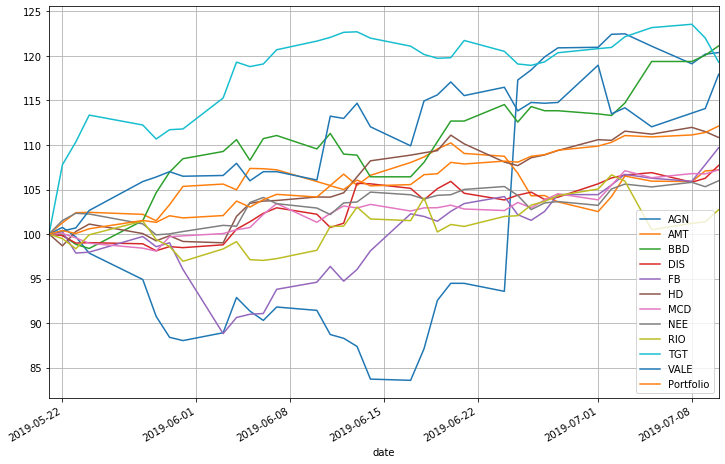

In [6]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(.02, backlogs_pos_threshold=.7)
quote.setup_mask({'BBD', 'HD', 'RIO', 'DIS', 'FB', 'TGT', 'AGN', 'WMT'})
sd.update(quote.optimize_portfolio(.02))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(.02))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)